## 线性回归代码实现

In [1]:
import numpy as np
import matplotlib.pyplot as plt

##### 定义一个加载数据的函数

In [2]:
def loaddata():
    data = np.loadtxt('data/data1.txt',delimiter=',')
    n = data.shape[1]-1 #特征数
    X = data[:,0:n]
    y = data[:,-1].reshape(-1,1)
    return X,y

##### 特征归一化

In [3]:
def featureNormalize(X):
    mu = np.average(X,axis=0)
    sigma = np.std(X,axis=0,ddof=1)
    X = (X-mu)/sigma
    return X,mu,sigma

##### 计算损失函数
<img src="images/02.png" width="300" align="left"/>
<p>
<img src="images/03.png" width="300" align="left"/>

In [4]:
def computeCost(X,y,theta):
    m = X.shape[0]
    return np.sum(np.power(np.dot(X,theta)-y,2))/(2*m)

#### 梯度下降法求解
<img src="images/01.png" width="300" align="left"/>

In [5]:
def gradientDescent(X,y,theta,iterations,alpha):
    c = np.ones(X.shape[0]).transpose()
    X = np.insert(X,0,values=c,axis=1)#对原始数据加入一个全为1的列
    m = X.shape[0]
    n = X.shape[1]
    costs=np.zeros(iterations)
    for num in range(iterations):
        for j in range(n):
            theta[j] = theta[j]+(alpha/m)*(np.sum(y-np.dot(X,theta)*X[:,j].reshape(-1,1)))
        costs[num] = computeCost(X,y,theta)
    return theta,costs

In [ ]:
##### 预测函数

In [6]:
def predict(X):
    X = (X-mu)/sigma
    c = np.ones(X.shape[0]).transpose()
    X = np.insert(X,0,values=c,axis=1)
    return np.dot(X,theta)

In [7]:
X,y = loaddata()
X,mu,sigma = featureNormalize(X)
theta = np.zeros(X.shape[1]+1).reshape(-1,1)
iterations = 400
alpha = 0.01
theta,costs = gradientDescent(X,y,theta,iterations,alpha)
# theta = gradientDescent(X,y,theta,iterations,alpha)

##### 画损失函数图

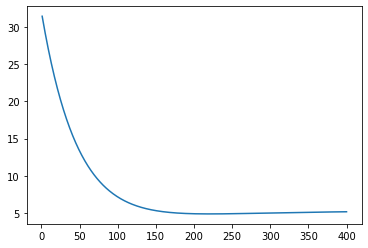

In [8]:
x_axis = np.linspace(1,iterations,iterations)
plt.plot(x_axis,costs[0:iterations])

##### 画数据散点图和求得的直线

In [26]:
print(theta)

[[5.73431935]
 [5.78954748]]


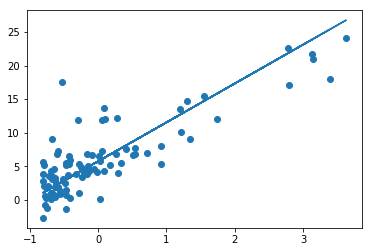

In [27]:
plt.scatter(X,y)
h_theta = theta[0]+theta[1]*X
plt.plot(X,h_theta)

##### 预测数据

In [43]:
print(predict([[8.4084]]))

[[6.10623791]]
